# Libraries

In [1]:
import requests
import bs4
from collections import Counter
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import wordnet as wn 

In [2]:
import os

In [8]:
cwd = os.getcwd()
cwd

'/Users/dibyendumandal/Google Drive/DIBYENDU/JOB_DataIncubator/Project_Indian_Middle_eastern_and_French'

In [9]:
os.listdir(cwd)

['.ipynb_checkpoints', 'workspace_large.ipynb', 'workspace_small.ipynb']

In [5]:
os.path.exists('memo.txt')

False

In [10]:
os.path.exists('workspace_small.ipynb')

True

In [11]:
os.path.isdir('workspace_small.ipynb')

False

In [12]:
os.path.isfile('workspace_small.ipynb')

True

In [13]:
import dbm

In [14]:
db = dbm.open('test', 'c')

In [15]:
os.listdir(cwd)

['.ipynb_checkpoints',
 'test.db',
 'workspace_large.ipynb',
 'workspace_small.ipynb']

In [17]:
db['test_key'] = 'test_value'
db['test_key_int'] = '2'

In [18]:
db['test_key']

b'test_value'

In [19]:
print(db['test_key'])

b'test_value'


In [22]:
str(db['test_key'])

"b'test_value'"

In [23]:
import pickle

In [24]:
db['test_key_int'] = pickle.dumps(1)

In [31]:
pickle.loads(db['test_key_int'])

1

## Strategy 

I. Get all URLs, store them in a list

II. For each URL, get
1. name
2. ingredients
3. URL

and then create a dictionary

III. Save the dictionaries in a list

IV. Convert into a dataframe

### I. Get all URLs, store them in a list

In [33]:
def recipe_urls_in_a_page(url):
    """Given an webpage url returns a list of 
    recipe urls in the webpage
    (CAUTION: Applies to allrecipes.com only)"""
    
    res = requests.get(url)
    res.raise_for_status()
    soup = bs4.BeautifulSoup(res.text, "lxml")
    elems = soup.find_all('article', class_ = "fixed-recipe-card")
    recipe_urls = [elem.find_all('a')[0].get('href') for elem in elems]
    return recipe_urls

In [34]:
NUM_PAGES_ME = 21
base_url_me = "https://www.allrecipes.com/recipes/235/world-cuisine/middle-eastern/?page="

In [35]:
from time import sleep

In [50]:
recipe_urls_me = []
for page_num in range(1, NUM_PAGES_ME + 1):
    print('Souping page number', page_num, ', ', 
          len(recipe_urls_me), ' found so far')
    url = base_url_me + str(page_num)
    recipe_urls_me.extend(recipe_urls_in_a_page(url))
    sleep(30)

Souping page number 1 ,  0  found so far
Souping page number 2 ,  28  found so far
Souping page number 3 ,  48  found so far
Souping page number 4 ,  68  found so far
Souping page number 5 ,  88  found so far
Souping page number 6 ,  108  found so far
Souping page number 7 ,  128  found so far
Souping page number 8 ,  148  found so far
Souping page number 9 ,  168  found so far
Souping page number 10 ,  188  found so far
Souping page number 11 ,  208  found so far
Souping page number 12 ,  228  found so far
Souping page number 13 ,  248  found so far
Souping page number 14 ,  268  found so far
Souping page number 15 ,  288  found so far
Souping page number 16 ,  308  found so far
Souping page number 17 ,  328  found so far
Souping page number 18 ,  348  found so far
Souping page number 19 ,  368  found so far
Souping page number 20 ,  388  found so far
Souping page number 21 ,  408  found so far


In [62]:
' '.join(recipe_urls_me[-1].split('/')[-2].split('-')).title()

'Yemeni Haroset'

In [51]:
f = open('middle_eastern_recipes_urls.txt', 'w')
for url in recipe_urls_me:
    f.write(url+'\n')
f.close()

In [63]:
f = open('middle_eastern_recipes_urls.txt')
for i, line in enumerate(f):
    print(line.rstrip())
    if i>9: break
f.close()

https://www.allrecipes.com/recipe/64519/kafta/
https://www.allrecipes.com/recipe/26921/real-hummus/
https://www.allrecipes.com/recipe/81603/baba-ghanoush/
https://www.allrecipes.com/recipe/242254/hamusta-soup/
https://www.allrecipes.com/recipe/68828/easy-lamb-shawarma/
https://www.allrecipes.com/recipe/218488/turkish-kebabs/
https://www.allrecipes.com/recipe/150654/thick-style-lebanese-garlic-sauce/
https://www.allrecipes.com/recipe/22394/lavosh/
https://www.allrecipes.com/recipe/73059/umm-ali/
https://www.allrecipes.com/recipe/14830/hummus-iii/
https://www.allrecipes.com/recipe/25309/seans-falafel-and-cucumber-sauce/


### II. For each URL, get
1. name
2. ingredients
3. url

Create a dictionary

III. Save the dictionaries in a list ###

In [64]:
def recipe_details(url):
    """Given a url of a recipe returns a list of ingredients
    (CAUTION: Applies to allrecipes.com only)"""    
    
    recipe = {}
    name = ' '.join(url.split('/')[-2].split('-')).title()
    ingredients = []
    res = requests.get(url)
    res.raise_for_status()
    soup = bs4.BeautifulSoup(res.text, "lxml")
    lines = soup.find_all('li', class_= "checkList__line")[:-4]
    for line in lines:
        item = line.find('label').get('title').split(" ")
        ingredients.extend(item)
                          
    return {
        "name": name,
        "ingredients": ingredients,
        "url": url}

In [66]:
recipes = []
f = open('middle_eastern_recipes_urls.txt')
for line in f:
    recipes+= [line.rstrip()]
    
recipes[:10]

['https://www.allrecipes.com/recipe/64519/kafta/',
 'https://www.allrecipes.com/recipe/26921/real-hummus/',
 'https://www.allrecipes.com/recipe/81603/baba-ghanoush/',
 'https://www.allrecipes.com/recipe/242254/hamusta-soup/',
 'https://www.allrecipes.com/recipe/68828/easy-lamb-shawarma/',
 'https://www.allrecipes.com/recipe/218488/turkish-kebabs/',
 'https://www.allrecipes.com/recipe/150654/thick-style-lebanese-garlic-sauce/',
 'https://www.allrecipes.com/recipe/22394/lavosh/',
 'https://www.allrecipes.com/recipe/73059/umm-ali/',
 'https://www.allrecipes.com/recipe/14830/hummus-iii/']

In [92]:
recipes_in_detail = []
for url in recipes:
    recipes_in_detail += [recipe_details(url)]
    sleep(10)
    
#recipes_in_detail

In [75]:
import csv

In [93]:
for recipe_in_detail in recipes_in_detail:
    print(recipe_in_detail['name'])

Kafta
Real Hummus
Baba Ghanoush
Hamusta Soup
Easy Lamb Shawarma
Turkish Kebabs
Thick Style Lebanese Garlic Sauce
Lavosh
Umm Ali
Hummus Iii
Seans Falafel And Cucumber Sauce
Peppys Pita Bread
Lentils And Rice With Fried Onions Mujadarrah
Asparagus Cashew Rice Pilaf
Extra Easy Hummus
Pita Chips
Middle Eastern Rice With Black Beans And Chickpeas
Baba Ghanoush
Kofta Kebabs
Easy Hummus
Company Couscous
Easy Baklava
Lebanese Chicken And Potatoes
Shish Tawook Grilled Chicken
Fasoliyyeh Bi Z Zayt Syrian Green Beans With Olive Oil
Tabbouleh Iii
Shish Tawook Marinated Chicken
Lentil And Green Collard Soup
Chakchouka Shakshouka
Mid Eastern Chicken Thighs
Easy Curry Couscous
Kafta
Fatoosh
Syrian Bread
Sun Dried Tomato Hummus
Authentic Kicked Up Syrian Hummus
Israeli Salad
Mujaddara Arabic Lentil Rice
Thick Style Lebanese Garlic Sauce
Balela Salad
Tabbouleh I
Whole Wheat Pita Bread
Slow Cooker Moroccan Chicken
Lebanese Lemon Salad Dressing
Fusion Hummus
Lamb Ribs With Honey And Wine
Tabbouleh Ii
Aut

In [94]:
df_recipes_in_detail = pd.DataFrame(recipes_in_detail)

In [289]:
def list_to_string(items):
    return " ".join(items)

In [290]:
list_to_string(df_recipes_in_detail['ingredients'][0])

'1 1/2 pounds lean ground beef 1 medium onion, grated 1/2 cup finely chopped fresh parsley 1/4 teaspoon cayenne pepper 1/4 teaspoon ground allspice 1 teaspoon salt, or to taste 1/4 teaspoon black pepper'

In [291]:
df_recipes_in_detail['ingredients_string'] = \
df_recipes_in_detail['ingredients'].apply(list_to_string)

In [292]:
df_recipes_in_detail.head()

,ingredients,name,url,ingredients_proper,ingredients_string
0,"[1, 1/2, pounds, lean, ground, beef, 1, medium...",Kafta,https://www.allrecipes.com/recipe/64519/kafta/,"[cayenne, onion, parsley, pepper, salt]","1 1/2 pounds lean ground beef 1 medium onion, ..."
1,"[1, clove, garlic, 1, (19, ounce), can, garban...",Real Hummus,https://www.allrecipes.com/recipe/26921/real-h...,"[clove, garbanzo, garlic, pepper, salt, tahini]",1 clove garlic 1 (19 ounce) can garbanzo beans...
2,"[1, large, eggplant, 1, head, garlic, 1, table...",Baba Ghanoush,https://www.allrecipes.com/recipe/81603/baba-g...,"[eggplant, garlic, oil, tahini]",1 large eggplant 1 head garlic 1 tablespoon re...
3,"[4, leaves, Swiss, chard,, stalks, discarded, ...",Hamusta Soup,https://www.allrecipes.com/recipe/242254/hamus...,"[carrot, celery, chard, clove, garlic, potato,...","4 leaves Swiss chard, stalks discarded and lea..."
4,"[2, cups, plain, yogurt, 1/4, cup, distilled, ...",Easy Lamb Shawarma,https://www.allrecipes.com/recipe/68828/easy-l...,"[bay, cinnamon, clove, garlic, lamb, oil, onio...",2 cups plain yogurt 1/4 cup distilled white vi...


In [293]:
df_recipes_in_detail.to_csv('ME_recipes_details.csv', index=False)

In [294]:
df = pd.read_csv('ME_recipes_details.csv')

In [295]:
df.sample(5)

,ingredients,name,url,ingredients_proper,ingredients_string
331,"['2', 'sweet', 'bell', 'peppers,', 'seeded', '...",Traditional Muhammara Syrian Hot Pepper Dip,https://www.allrecipes.com/recipe/220985/tradi...,"['clove', 'cumin', 'garlic', 'molasses', 'oil'...","2 sweet bell peppers, seeded and quartered 3 s..."
184,"['1/2', 'cup', 'bulgur', '1/2', 'cup', 'hot', ...",Kibbee Lebanese Style,https://www.allrecipes.com/recipe/201182/kibbe...,"['bulgur', 'cinnamon', 'lamb', 'mint', 'onion'...",1/2 cup bulgur 1/2 cup hot water 1/2 teaspoon ...
382,"['1', '(15', 'ounce)', 'can', 'chickpeas', '(g...",Tomato Pesto Hummus,https://www.allrecipes.com/recipe/239806/tomat...,"['basil', 'chickpea', 'clove', 'garlic', 'lime...","1 (15 ounce) can chickpeas (garbanzo beans), d..."
137,"['1', '1/2', 'cups', 'finely', 'ground', 'waln...",The Rebbetzin Chefs Persian Walnut Cookies,https://www.allrecipes.com/recipe/103170/the-r...,"['cardamom', 'egg', 'sugar', 'walnut', 'yolk']",1 1/2 cups finely ground walnuts 3 egg yolks 3...
413,"['1', '1/4', 'pounds', 'ground', 'lamb', '1/2'...",Kadin Buddu Kofta Turkish Meatballs,https://www.allrecipes.com/recipe/258399/kadin...,"['dill', 'egg', 'flour', 'garam', 'lamb', 'pep...",1 1/4 pounds ground lamb 1/2 cup cooked rice 1...


In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 5 columns):
ingredients           424 non-null object
name                  424 non-null object
url                   424 non-null object
ingredients_proper    424 non-null object
ingredients_string    424 non-null object
dtypes: object(5)
memory usage: 16.6+ KB


In [297]:
df['ingredients_string'][0].split()

['1',
 '1/2',
 'pounds',
 'lean',
 'ground',
 'beef',
 '1',
 'medium',
 'onion,',
 'grated',
 '1/2',
 'cup',
 'finely',
 'chopped',
 'fresh',
 'parsley',
 '1/4',
 'teaspoon',
 'cayenne',
 'pepper',
 '1/4',
 'teaspoon',
 'ground',
 'allspice',
 '1',
 'teaspoon',
 'salt,',
 'or',
 'to',
 'taste',
 '1/4',
 'teaspoon',
 'black',
 'pepper']

In [146]:
me_ingredients_unique = set()
for i, ingredient in enumerate(df_recipes_in_detail['ingredients']):
    me_ingredients_unique = me_ingredients_unique | set(ingredient)
    # if i > 3: break
    
len(me_ingredients_unique)

1017

In [178]:
# Code help from https://stackoverflow.com/questions/40167612/
# how-to-keep-only-the-noun-words-in-a-wordlist-python-nltk
text=' '.join(me_ingredients_unique)
tokens = nltk.word_tokenize(text)
tags = nltk.pos_tag(tokens)

# ingredients should be nouns
nouns = [word for word, pos in tags 
         if (pos == 'NN' 
             or pos == 'NNP' 
             or pos == 'NNS' 
             or pos == 'NNPS')]

len(nouns)

582

In [181]:
nouns = list(set(nouns))
len(nouns)

477

In [182]:
nouns.sort()
nouns[:10]

['%',
 'Aleppo',
 'Arabic',
 'Brine',
 'C',
 'Cheddar',
 'Chevre-Yogurt',
 'Condiments',
 'Crystal',
 'Delicious']

In [183]:
nouns = [noun.lower() for noun in nouns]
nouns.sort()
nouns

['%',
 'aleppo',
 'allspice',
 'almond',
 'almonds',
 'amount',
 'anchovy',
 'apple',
 'apples',
 'apricots',
 'arabic',
 'artichokes',
 'asafoetida',
 'asparagus',
 'baby',
 'bacon',
 'bags',
 'banana',
 'bananas',
 'barberries',
 'basil',
 'bay',
 'bean',
 'beans',
 'beet',
 'beets',
 'biber',
 'bittersweet',
 'boiling',
 'boneless',
 'bones',
 'bouillon',
 'bowl',
 'box',
 'bread',
 'breadcrumbs',
 'breads',
 'breast',
 'breasts',
 'brine',
 'broth',
 'buckwheat',
 'bulbs',
 'bulgur',
 'bunches',
 'butter',
 'buttermilk',
 'butternut',
 'c',
 'cabbage',
 'cake',
 'cannellini',
 'canola',
 'cans',
 'capers',
 'cardamom',
 'carrot',
 'carrots',
 'carton',
 'cashew',
 'cauliflower',
 'cayenne',
 'celery',
 'cereal',
 'chard',
 'cheddar',
 'cheese',
 'chevre-yogurt',
 'chicken',
 'chickpea',
 'chickpeas',
 'chili',
 'chives',
 'chocolate',
 'chorizo',
 'chunks',
 'cilantro',
 'cinnamon',
 'clove',
 'cloves',
 'coat',
 'coconut',
 'coffee',
 'collard',
 'color',
 'coloring',
 'condiments

In [277]:
me_ingredients_unique = [
 'almond',
 'almonds',
 'anchovy',
 'apple',
 'apples',
 'apricots',
 'artichokes',
 'asafoetida',
 'asparagus',

 'bacon',
 'banana',
 'bananas',
 'barberries',
 'basil',
 'bay',
 'beet',
 'beets',
 'brine',
 'buckwheat',
 
 'bulgur',
 'butter',
 'buttermilk',
 'butternut',

 'cabbage',
 'cannellini',
 'canola',
 'capers',
 'cardamom',
 'carrot',
 'carrots',
 'cashew',
 'cauliflower',
 'cayenne',
 'celery',
 'chard',
 'cheddar',
 'chevre-yogurt',
 'chicken',
 'chickpea',
 'chickpeas',
 'chili',
 'chives',
 'chocolate',
 'chorizo',
 'cilantro',
 'cinnamon',
 'clove',
 'cloves',
 'coconut',
 'coffee',
 'collard',
 'color',
 'corn',
 'cottage',
 'cranberries',
 'cream',
 'cucumber',
 'cucumbers',
 'cumin',
 'currants',

 'date',
 'dates',
 'dill',
 'duck',

 'egg',
 'eggplant',
 'eggplants',
 'eggs',

 'farina',
 'fennel',
 'figs',
 'flatbread',
 'flour',
 'fraiche',
 'fresco',

 'garam',
 'garbanzo',
 'garlic',
 'gelatin',
 'ghee',
 'graham',
 'grape',
 'grapeseed',
 'greens',
 
 'habanero',
 'halloumi',
 'harissa',
 'honey',
 'hummus',

 'jalapeno',
 'jasmine',
 'jicama',

 'kabsa',

 'lamb',
 'lemons',
 'lentils',
 'lettuce',
 'lime',
 'livers',

 'mahleb',
 'mango',
 'maple',
 'margarine',
 'marjoram',
 'mascarpone',
 'matzo',
 'mayonnaise',
 'meat',  
 'medjool',
 'merguez',
 'middle',
 'milk',
 'mint',
 'molasses',
 'muenster',
 'mushroom',
 'mushrooms',

 'noodles',
 'nuts',

 'oats',
 'oil',
 'onion',
 'onions',
 'orange',
 'oranges',
 'oregano',
 'orzo',

 'paprika',
 'parmesan',
 'parsley',
 'parsnip',
 'peach',
 'peaches',
 'peanut',
 'peanuts',
 'peas',
 'pecan',
 'pecans',
 'pekoe',
 'pepper',
 'peppercorns',
 'peppers',
 'phyllo',
 'pickles',
 'pilaf',
 'pimento',
 'pine',
 'pinto',
 'pistachio',
 'pistachios',
 'plum',
 'pomegranate',
 'popcorn',
 'potato',
 'potatoes',
 'prunes',

 'rabbit',
 'radishes',
 'ranch',
 'ravioli',
 'rice',
 'ricotta',
 'roma',
 'romaine',
 'rosewater',
 'russet',
 'rutabaga',

 'saffron',
 'sage',
 'salmon',
 'salt',
 'sausage',
 'scallion',
 'scallions',
 'semolina',
 'sesame',
 'shallot',
 'shallots',
 'sirloin',
 'soybeans',
 'spaghetti',
 'spinach',
 'splenda',
 'squash',
 'steak',
 'strawberries',
 'sugar',
 'sultana',
 'sumac',
 'sunflower',

 'tabasco',
 'taco',
 'tahini',
 'tamari',
 'tapioca',
 'tarragon',
 'thyme',
 'tilapia',
 'tofu',
 'tomato',
 'tomatoes',
 'tuna',
 'turkey',
 'turnip',
 'turnips',
 'tzatziki',

 'vanilla',
 'vidalia',
 'vinegar',

 'walnut',
 'walnuts',
 'wasabi',
 'weed',
 'wheat',
 'wine',
 'wonton',
 'worcestershire',

 'yeast',
 'yogurt',
 'yolk',
 'yolks',   

 "za'atar",
 'zest',
 'zucchini',
 'zucchinis']

In [278]:
len(me_ingredients_unique)

225

In [279]:
replace_list_s = ['almosnds', 'apples', 'bananas', 'beans','beets', 
                  'breads', 'carrots', 'chickpeas', 'cloves', 
                  'cucumbers', 'eggplants', 'eggs', 'mushrooms', 
                  'onions', 'oranges', 'peanuts', 'peppers', 
                  'pistachios',  'scallions', 'shallots', 'turnips',
                  'walnuts', 'yolks', 'zucchinis']

replace_list_es = ['potatoes', 'tomatoes']

In [280]:
def ingredients_proper(ingredients):
    
    items = [item[:-1] if item.endswith(',') else item
             for item in ingredients]
    
    items = [item for item in items 
             if item in me_ingredients_unique]
    
    items = [item[:-1] if item in replace_list_s else item
             for item in items] 
    
    items = [item[:-2] if item in replace_list_es else item
             for item in items] 
    
    items = list(set(items))
    items.sort()
    return items
    
# ingredients_proper(df_recipes_in_detail['ingredients'][11])

In [281]:
ingredients_proper(df_recipes_in_detail['ingredients'][300])

['carrot',
 'chicken',
 'clove',
 'garlic',
 'onion',
 'pepper',
 'potato',
 'salt',
 'walnut']

In [282]:
df_recipes_in_detail['ingredients_proper'] = \
df_recipes_in_detail['ingredients'].apply(ingredients_proper)
df_recipes_in_detail['ingredients_proper'].head()

0              [cayenne, onion, parsley, pepper, salt]
1      [clove, garbanzo, garlic, pepper, salt, tahini]
2                      [eggplant, garlic, oil, tahini]
3    [carrot, celery, chard, clove, garlic, potato,...
4    [bay, cinnamon, clove, garlic, lamb, oil, onio...
Name: ingredients_proper, dtype: object

In [283]:
df_recipes_in_detail.iloc[327][['ingredients', 'ingredients_proper']]

ingredients           [3, 1/2, cups, whole, milk,, or, more, as, nee...
ingredients_proper                                  [milk, rice, sugar]
Name: 327, dtype: object

In [284]:
'garlic,'.endswith(',')

True

In [285]:
ingredients = []
for item in df_recipes_in_detail['ingredients_proper']:
    ingredients+=item

ingredients[:10]

['cayenne',
 'onion',
 'parsley',
 'pepper',
 'salt',
 'clove',
 'garbanzo',
 'garlic',
 'pepper',
 'salt']

In [286]:
count = pd.Series(ingredients).value_counts()

In [287]:
count[:20]

salt        254
oil         250
garlic      217
onion       207
pepper      204
clove       180
tomato      124
cumin        97
parsley      88
sugar        78
butter       66
flour        64
egg          57
mint         56
chicken      54
yogurt       52
cinnamon     52
tahini       50
garbanzo     44
rice         38
dtype: int64

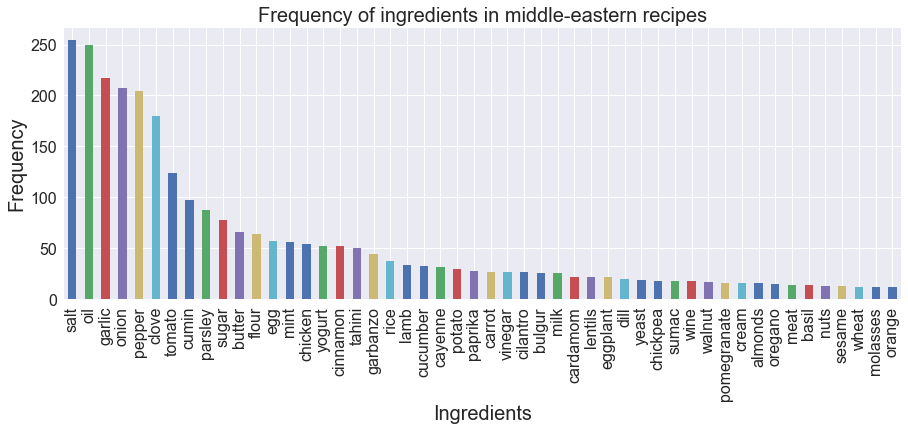

In [288]:
count[:50].plot(kind='bar', figsize=(15, 5), rot = 90, fontsize=16)

plt.xlabel('Ingredients', size=20)
plt.ylabel('Frequency', size=20)
plt.title('Frequency of ingredients in middle-eastern recipes', size=20);

In [121]:
def reviews_and_ratings(recipe_url):
    """Given a url of a recipe returns 
    the number of reviews and rating
    (CAUTION: Applies to allrecipes.com only)"""    
    
    res = requests.get(recipe_url)
    res.raise_for_status()
    soup = bs4.BeautifulSoup(res.text, "lxml")
    reviews = int(soup.find('span', class_="review-count").getText().split(' ')[0])
    rating = float(soup.find('div', class_="rating-stars").get("data-ratingstars"))
                          
    return reviews, rating

# Middle-eastern recipes

## Sites to explore

In [122]:
NUM_PAGES_ME = 21
base_url_me = "https://www.allrecipes.com/recipes/235/world-cuisine/middle-eastern/?page="

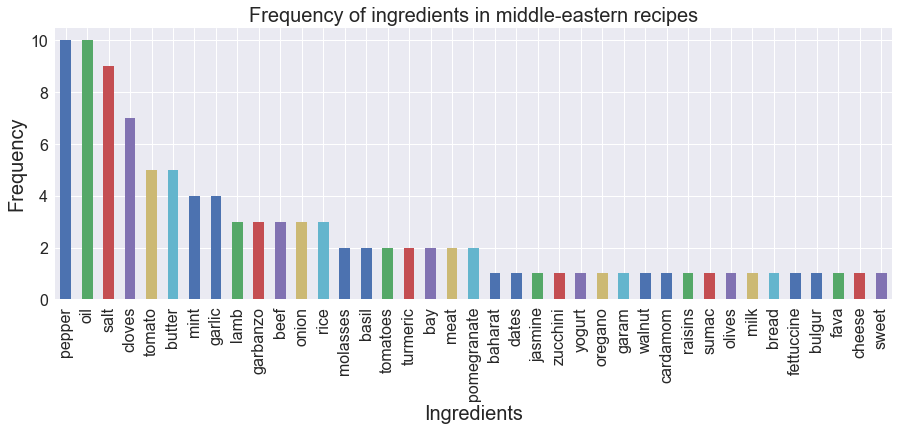

In [123]:
# list of urls of recipes 
recipe_urls = recipe_urls_in_page(url)

# list of words in the recipes 
ingredient_list = []
for recipe_url in recipe_urls:
    ingredient_list.extend(ingredients(recipe_url))
    
ingredient_list = [ingredient.lower() for ingredient in ingredient_list]

# list of unique words in recipes
ingredient_unique = list(set(ingredient_list))

# Code help from https://stackoverflow.com/questions/40167612/
# how-to-keep-only-the-noun-words-in-a-wordlist-python-nltk
text=' '.join(ingredient_unique)
tokens = nltk.word_tokenize(text)
tags = nltk.pos_tag(tokens)
# ingredients should be nouns
nouns = [word for word, pos in tags if (pos == 'NN' or pos == 'NNP' 
                                       or pos == 'NNS' or pos == 'NNPS')]
# nouns but not ingredients
to_remove_set = {'aleppo', 'beans', 'bittersweet', 'boneless', 'bunch', 'bunches',
                  'cooking', 'dressing', 'drumsticks', 'fat', 'firmly', 'flakes','greek-style',
                  'ground', 'halves', 'head', 'inch', 'juice', 'leaves', 'leg', 'liquid',
                  'mix', 'ounce', 'ounces', 'package', 'paste', 'pieces', 'plus', 'pods',
                  'pound', 'pounds', 'romaine', 'russet', 'slices', 'slivers', 'spicy', 'stew',
                  'sticks', 'strips', 'tablespoons', 'taste', 'teaspoons', 'water',
                  'cup', 'cups', 'tablespoon', 'ripe', 'basmati', 'bell', 'quart', 'pinch',
                  'thighs', 'half-and-half', 'cultures'}

# unique ingredients
ingredients = set(nouns) - to_remove_set

# list of actual ingredients in recipes
ingredient_list_w_rep = [item for item in ingredient_list if item in ingredients]
# replace breads by bread, and so on
replace_list = ['breads','onions', 'peppers']
ingredient_list_wo_rep = [item if item not in replace_list else item[:-1] 
                          for item in ingredient_list_w_rep if item in ingredients]

ingredient_series = pd.Series(ingredient_list_wo_rep)
ingredient_series.value_counts().plot(kind='bar', figsize=(15, 5), rot = 90, fontsize=16)

plt.xlabel('Ingredients', size=20)
plt.ylabel('Frequency', size=20)
plt.title('Frequency of ingredients in middle-eastern recipes', size=20);

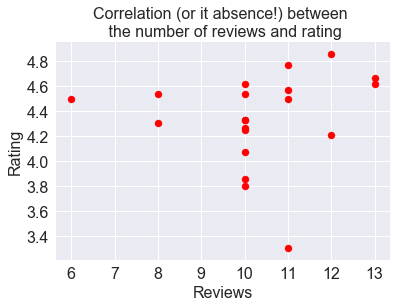

In [124]:
# list of reviews and ratings
revs_and_rate = []
for recipe_url in recipe_urls:
    revs_and_rate.append(reviews_and_ratings(recipe_url))
df = pd.DataFrame(revs_and_rate, columns=['reviews', 'rating'])

plt.scatter(df.reviews, df.rating, c='r', s=50)
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel('Reviews', size=16)
plt.ylabel('Rating', size=16)
plt.title('Correlation (or it absence!) between \n the number of reviews and rating', size=16);